In [824]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [825]:
df_final_experiment_clients= pd.read_csv('df_final_experiment_clients.txt', delimiter=',',encoding='utf-8')
df_final_experiment_clients.to_csv('df_final_experiment_clients.csv', index=False)

In [826]:
df_final_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [827]:
df_final_experiment_clients.shape

(70609, 2)

In [828]:
df_final_experiment_clients.isna().sum()

client_id        0
Variation    20109
dtype: int64

In [829]:
df_final_experiment_clients.drop_duplicates

<bound method DataFrame.drop_duplicates of        client_id Variation
0        9988021      Test
1        8320017      Test
2        4033851   Control
3        1982004      Test
4        9294070   Control
...          ...       ...
70604    2443347       NaN
70605    8788427       NaN
70606     266828       NaN
70607    1266421       NaN
70608    9895983       NaN

[70609 rows x 2 columns]>

In [830]:
df_final_experiment_clients["Variation"].unique()

array(['Test', 'Control', nan], dtype=object)

In [831]:
df_final_experiment_clients.dropna(inplace=True)

In [832]:
df_final_experiment_clients.shape

(50500, 2)

In [833]:
df_final_experiment_clients['Variation'].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [834]:
df_client_experiment = pd.read_csv("combined_data.csv")

In [835]:
df_client_experiment.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [836]:
df_final = pd.merge(df_final_experiment_clients, df_client_experiment, on='client_id', how='inner')

In [837]:
df_final.isna().sum()

client_id       0
Variation       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [838]:
df_final.dtypes

client_id        int64
Variation       object
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [839]:
df_final['date_time'] = pd.to_datetime(df_final['date_time'])

In [840]:
df_final['Variation'].unique()

array(['Test', 'Control'], dtype=object)

In [841]:
df_final.to_csv('df_final.csv', index =False)

In [844]:
df_test = df_final[df_final['Variation'] == 'Test']

df_control = df_final[df_final['Variation'] == 'Control']

In [842]:
df_test.to_csv("df_final_test.csv", index=False)

In [843]:
df_control.to_csv("df_final_control.csv", index=False)

In [845]:
df_test.nunique()

client_id        26968
Variation            1
visitor_id       29919
visit_id         37136
process_step         5
date_time       164138
dtype: int64

In [846]:
df_control.nunique()

client_id        23532
Variation            1
visitor_id       26277
visit_id         32189
process_step         5
date_time       132754
dtype: int64

In [847]:
df_control.head()

,client_id,Variation,visitor_id,visit_id,process_step,date_time
20,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03
21,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01
22,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52
23,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08
24,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43


In [848]:
num_confirm_test = df_test[df_test['process_step'] == 'confirm'].shape[0]
num_confirm_control = df_control[df_control['process_step'] == 'confirm'].shape[0]

In [849]:
df_test_confirm = df_test[df_test['process_step'] == 'confirm']
df_control_confirm = df_control[df_control['process_step'] == 'confirm']

# Agrupar por 'client_id' y contar el número de clientes únicos que llegan a 'confirm'
num_confirm_test_clients = df_test_confirm['client_id'].nunique()
num_confirm_control_clients = df_control_confirm['client_id'].nunique()

# Contar el número total de clientes únicos en cada DataFrame
total_test_clients = df_test['client_id'].nunique()
total_control_clients = df_control['client_id'].nunique()

# Calcular el porcentaje de clientes que llegaron a 'confirm'
percentage_confirm_test = (num_confirm_test_clients / total_test_clients) * 100
percentage_confirm_control = (num_confirm_control_clients / total_control_clients) * 100

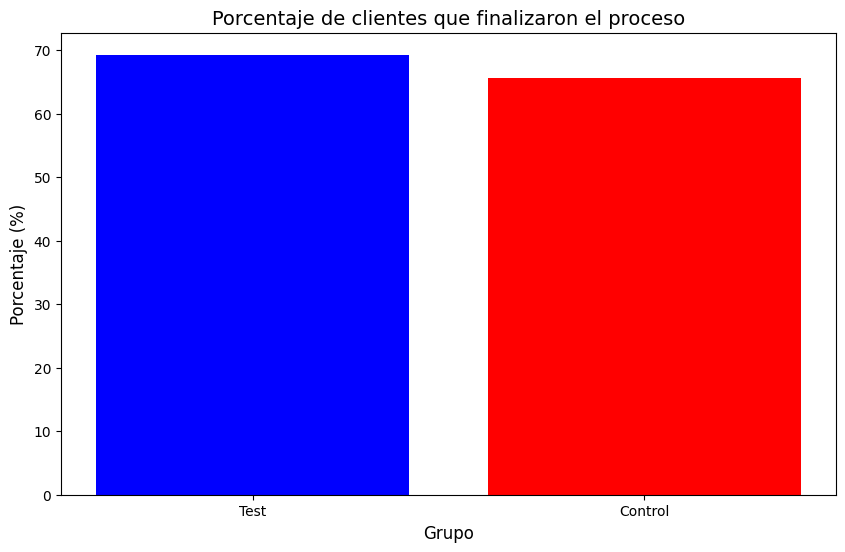

In [850]:
categories = ['Test', 'Control']
percentages = [percentage_confirm_test, percentage_confirm_control]
totals = [total_test, total_control]
confirms = [num_confirm_test, num_confirm_control]
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(categories, percentages, color=['blue', 'red'],label='Percentage Confirmed')

ax.set_title('Porcentaje de clientes que finalizaron el proceso', fontsize=14)
ax.set_xlabel('Grupo', fontsize=12)
ax.set_ylabel('Porcentaje (%)', fontsize=12)
plt.show()

In [851]:
df_sorted_control = df_sorted_control.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])

step_order = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
df_sorted_control['step_order'] = df_sorted_control['process_step'].map(step_order)

# Calcular el tiempo transcurrido entre los pasos
df_sorted_control['previous_step'] = df_sorted_control.groupby(['client_id', 'visitor_id', 'visit_id'])['process_step'].shift(1)
df_sorted_control['next_date_time'] = df_sorted_control.groupby(['client_id', 'visitor_id', 'visit_id'])['date_time'].shift(-1)
df_sorted_control['time_spent'] = (df_sorted_control['next_date_time'] - df_sorted_control['date_time']).dt.total_seconds()

# Excluir el tiempo entre 'start' y 'confirm'
df_sorted_control['time_spent'] = df_sorted_control.apply(
    lambda row: row['time_spent'] if not (row['previous_step'] == 'start' and row['process_step'] == 'confirm') else 0,
    axis=1
)

# Eliminar las columnas temporales
df_sorted_control = df_sorted_control.drop(columns=['previous_step', 'next_date_time'])
df_sorted_control.loc[df_sorted_control['process_step'] == 'confirm', 'time_spent'] = 0
# Agrupar por 'process_step', ordenar por 'step_order', y sumar el tiempo gastado
time_spent_per_step_control = df_sorted_control.groupby('process_step')['time_spent'].mean()
time_spent_per_step_control = time_spent_per_step_control.reindex(step_order.keys())  # Ordenar por el orden definido

# Mostrar el tiempo total en cada paso
print(time_spent_per_step_control)

process_step
start       62.906464
step_1      50.227453
step_2      91.579342
step_3     135.375146
confirm      0.000000
Name: time_spent, dtype: float64


In [852]:
df_sorted_test = df_test
df_sorted_test['date_time'] = pd.to_datetime(df_sorted_test['date_time'])

# Ordenar el DataFrame por 'client_id', 'visitor_id', 'visit_id' y 'date_time'
df_sorted_test = df_sorted_test.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])

# Definir el orden de los pasos

df_sorted_test['step_order'] = df_sorted_test['process_step'].map(step_order)

# Calcular el tiempo transcurrido entre los pasos
df_sorted_test['previous_step'] = df_sorted_test.groupby(['client_id', 'visitor_id', 'visit_id'])['process_step'].shift(1)
df_sorted_test['next_date_time'] = df_sorted_test.groupby(['client_id', 'visitor_id', 'visit_id'])['date_time'].shift(-1)
df_sorted_test['time_spent'] = (df_sorted_test['next_date_time'] - df_sorted_test['date_time']).dt.total_seconds()

# Excluir el tiempo entre 'start' y 'confirm'
df_sorted_test['time_spent'] = df_sorted_test.apply(
    lambda row: row['time_spent'] if not (row['previous_step'] == 'start' and row['process_step'] == 'confirm') else 0,
    axis=1
)

# Eliminar las columnas temporales
df_sorted_test = df_sorted_test.drop(columns=['previous_step', 'next_date_time'])
df_sorted_test.loc[df_sorted_test['process_step'] == 'confirm', 'time_spent'] = 0
# Agrupar por 'process_step', ordenar por 'step_order', y sumar el tiempo gastado
time_spent_per_step_test = df_sorted_test.groupby('process_step')['time_spent'].mean()
time_spent_per_step_test = time_spent_per_step_test.reindex(step_order.keys())  # Ordenar por el orden definido

# Mostrar el tiempo total en cada paso
print(time_spent_per_step_test)

/var/folders/6s/_0sz4qd138bbhl9jtknv8m000000gn/T/ipykernel_63982/2841264676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_test['date_time'] = pd.to_datetime(df_sorted_test['date_time'])


process_step
start       60.555121
step_1      60.499453
step_2      88.585598
step_3     128.953546
confirm      0.000000
Name: time_spent, dtype: float64


Saber si es mejor test(página nueva) o control (página vieja)

In [853]:
step_order = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
df_sorted_control['step_order'] = df_sorted_control['process_step'].map(step_order)

# Ordenar el DataFrame por 'client_id', 'visitor_id', 'visit_id' y 'date_time'
df_sorted_control = df_sorted_control.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])

# Identificar el paso anterior
df_sorted_control['previous_step_order'] = df_sorted_control.groupby(['client_id', 'visitor_id', 'visit_id'])['step_order'].shift(1)

# Identificar retrocesos (errores)
df_sorted_control['error'] = df_sorted_control['step_order'] < df_sorted_control['previous_step_order']

# Inicializar columna de errores ajustados
df_sorted_control['adjusted_error'] = False

# Ajustar errores: trasladar el error a la fila anterior si es un retroceso
for idx in range(1, len(df_sorted_control)):
    current_index = df_sorted_control.index[idx]
    previous_index = df_sorted_control.index[idx - 1]
    if df_sorted_control.loc[current_index, 'error']:
        # Si hay un error en la fila actual, marca el error en la fila anterior
        df_sorted_control.at[previous_index, 'adjusted_error'] = True

# Identificar los errores ajustados
error_steps = df_sorted_control[df_sorted_control['adjusted_error']]


df_sorted_control = df_sorted_control.drop(columns=['previous_step_order', 'error'])
df_sorted_control = df_sorted_control.rename(columns={'adjusted_error': 'error'})



In [854]:
df_sorted_control.head(60)

,client_id,Variation,visitor_id,visit_id,process_step,date_time,step_order,time_spent,error
173012,1028,Control,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,0,49.0,False
173011,1028,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,1,63.0,False
173010,1028,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,1,9.0,False
173009,1028,Control,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,2,275.0,False
173008,1028,Control,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,3,111.0,True
173007,1028,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:59:55,1,20.0,False
173006,1028,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:15,1,2.0,False
173005,1028,Control,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 19:00:17,2,9.0,True
173004,1028,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:26,1,NaN,False
37910,1104,Control,194240915_18158000533,543158812_46395476577_767725,start,2017-06-12 07:49:18,0,NaN,False


In [855]:
df_sorted_control["time_spent"] = df_sorted_control["time_spent"].fillna(0)

In [856]:
# Contar el número total de errores y el total de transiciones
total_errors_control = df_sorted_control['error'].sum()
total_transitions_control= df_sorted_control['error'].count()

# Calcular el porcentaje de errores
error_rate_control = (total_errors_control / total_transitions_control) * 100

# Mostrar el porcentaje de errores
print(f"Porcentaje de error en la antigua web: {error_rate_control:.2f}%")

Porcentaje de error en la antigua web: 6.70%


In [857]:
# Contar errores y transiciones por cada paso
errors_per_step_control = df_sorted_control.groupby('process_step')['error'].sum()
transitions_per_step_control = df_sorted_control.groupby('process_step')['error'].count()

# Calcular la tasa de error por cada paso
error_rate_per_step_control = (errors_per_step_control / transitions_per_step_control) * 100

# Mostrar la tasa de error por cada paso
print("Tasa de error por cada paso en la web antigua:")
for step, rate in error_rate_per_step_control.items():
    print(f"{step}: {rate:.2f}%")

Tasa de error por cada paso en la web antigua:
confirm: 4.05%
start: 0.00%
step_1: 8.40%
step_2: 8.36%
step_3: 18.64%


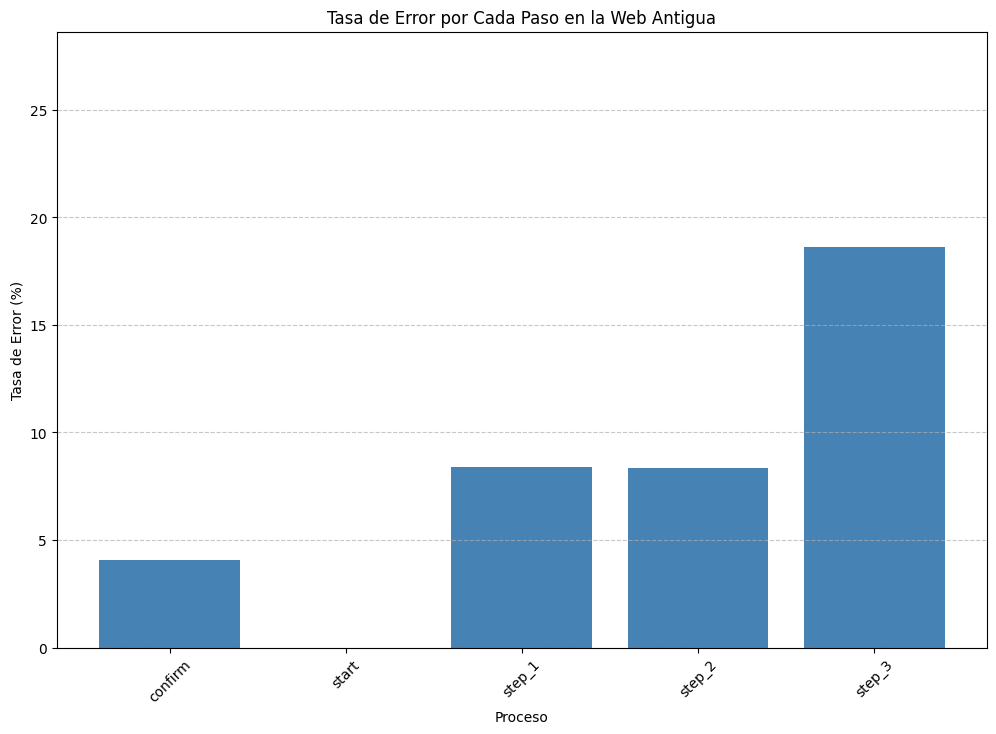

In [858]:
plt.figure(figsize=(12, 8))
plt.bar(error_rate_per_step_control.index, error_rate_per_step_control, color='steelblue')
plt.xlabel('Proceso')
plt.ylabel('Tasa de Error (%)')
plt.title('Tasa de Error por Cada Paso en la Web Antigua')
plt.ylim(0, max(error_rate_per_step_control) + 10)  # Ajustar límite superior para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()

In [859]:
step_order = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
df_sorted_test['step_order'] = df_sorted_test['process_step'].map(step_order)

# Ordenar el DataFrame por 'client_id', 'visitor_id', 'visit_id' y 'date_time'
df_sorted_test = df_sorted_test.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])

# Identificar el paso anterior
df_sorted_test['previous_step_order'] = df_sorted_test.groupby(['client_id', 'visitor_id', 'visit_id'])['step_order'].shift(1)

# Identificar retrocesos (errores)
df_sorted_test['error'] = df_sorted_test['step_order'] < df_sorted_test['previous_step_order']

# Inicializar columna de errores ajustados
df_sorted_test['adjusted_error'] = False

# Ajustar errores: trasladar el error a la fila anterior si es un retroceso
for idx in range(1, len(df_sorted_test)):
    current_index = df_sorted_test.index[idx]
    previous_index = df_sorted_test.index[idx - 1]
    if df_sorted_test.loc[current_index, 'error']:
        # Si hay un error en la fila actual, marca el error en la fila anterior
        df_sorted_test.at[previous_index, 'adjusted_error'] = True

# Identificar los errores ajustados
error_steps = df_sorted_test[df_sorted_test['adjusted_error']]


df_sorted_test = df_sorted_test.drop(columns=['previous_step_order', 'error'])
df_sorted_test = df_sorted_test.rename(columns={'adjusted_error': 'error'})

In [860]:
df_sorted_test["time_spent"] = df_sorted_test["time_spent"].fillna(0)

In [861]:
df_sorted_test


,client_id,Variation,visitor_id,visit_id,process_step,date_time,step_order,time_spent,error
94261,555,Test,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,0,7.0,False
94260,555,Test,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,1,32.0,False
94259,555,Test,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2,99.0,False
94258,555,Test,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,3,20.0,False
94257,555,Test,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,4,0.0,False
...,...,...,...,...,...,...,...,...,...
140278,9999729,Test,843385170_36953471821,493310979_9209676464_421146,step_1,2017-04-20 14:22:49,1,287.0,False
140277,9999729,Test,843385170_36953471821,493310979_9209676464_421146,step_2,2017-04-20 14:27:36,2,81.0,True
140276,9999729,Test,843385170_36953471821,493310979_9209676464_421146,start,2017-04-20 14:28:57,0,0.0,False
14818,9999832,Test,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,0,8.0,False


In [862]:
df_sorted_test.to_csv('error_test.csv', index= False)

In [863]:
df_sorted_control.to_csv('error_control.csv', index = False)

In [864]:
# Identificar retrocesos (errores)
df_sorted_test['previous_step_order'] = df_sorted_test.groupby(['client_id', 'visitor_id', 'visit_id'])['step_order'].shift(1)
df_sorted_test['error'] = df_sorted_test['step_order'] < df_sorted_test['previous_step_order']

# Contar el número total de errores y el total de transiciones
total_errors_test = df_sorted_test['error'].sum()
total_transitions_test = df_sorted_test['error'].count()

# Calcular el porcentaje de errores
error_rate_test = (total_errors_test / total_transitions_test) * 100

# Mostrar el porcentaje de errores
print(f"Porcentaje de error en la nueva web: {error_rate_test:.2f}%")

Porcentaje de error en la nueva web: 9.14%


In [865]:
errors_per_step_test = df_sorted_test.groupby('process_step')['error'].sum()
transitions_per_step_test = df_sorted_test.groupby('process_step')['error'].count()

# Calcular la tasa de error por cada paso
error_rate_per_step_test = (errors_per_step_test / transitions_per_step_test) * 100

print("Tasa de error por cada paso en la nueva web:")
for step, rate in error_rate_per_step_test.items():
    print(f"{step}: {rate:.2f}%")

Tasa de error por cada paso en la nueva web:
confirm: 0.00%
start: 18.62%
step_1: 8.81%
step_2: 7.38%
step_3: 0.11%


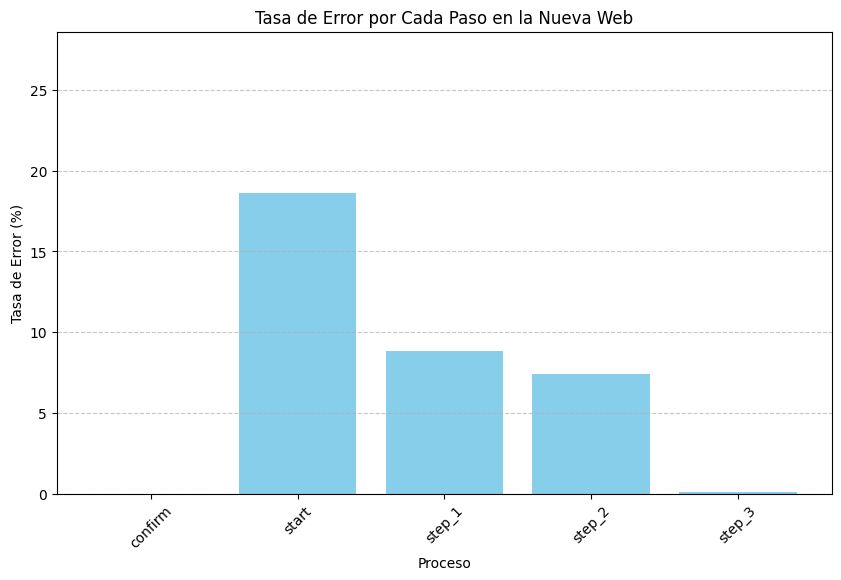

In [866]:
plt.figure(figsize=(10, 6))
plt.bar(error_rate_per_step_test.index, error_rate_per_step_test, color='skyblue')
plt.xlabel('Proceso')
plt.ylabel('Tasa de Error (%)')
plt.title('Tasa de Error por Cada Paso en la Nueva Web')
plt.ylim(0, max(error_rate_per_step_test) + 10)  # Ajustar límite superior para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()

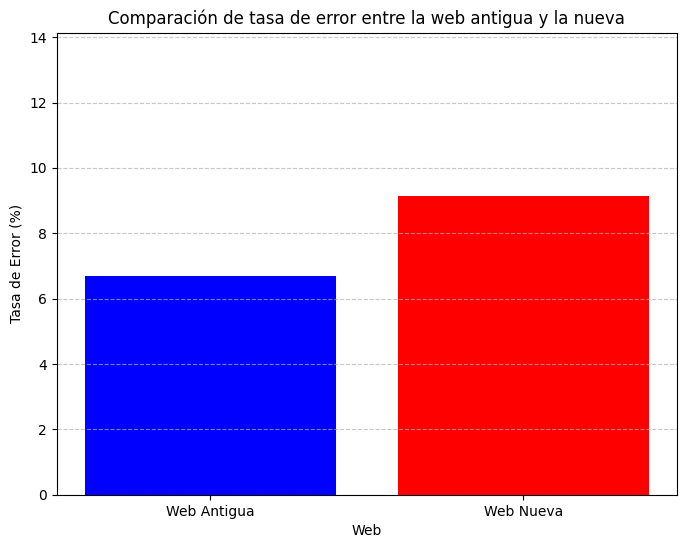

In [867]:
error_rates = {
    'Web Antigua': error_rate_control,
    'Web Nueva': error_rate_test
}

# Crear un DataFrame para graficar
error_rates_df = pd.DataFrame(list(error_rates.items()), columns=['Sistema', 'Tasa de Error (%)'])

# Graficar
plt.figure(figsize=(8, 6))
plt.bar(error_rates_df['Sistema'], error_rates_df['Tasa de Error (%)'], color=['blue', 'red'])
plt.xlabel('Web')
plt.ylabel('Tasa de Error (%)')
plt.title('Comparación de tasa de error entre la web antigua y la nueva')
plt.ylim(0, max(error_rates_df['Tasa de Error (%)']) + 5)  # Ajusta el límite superior para una mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [868]:
def calculate_unique_clients_by_step_control(df):
    
    # Filtrar por cada paso y contar clientes únicos
    steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
    results_control = {}
    
    for step in steps:
        step_df = df_sorted_control[df_sorted_control['process_step'] == step]
        unique_clients_count = step_df['client_id'].nunique()
        total_clients_count = step_df['client_id'].value_counts().sum()
        
        results[step] = {
            'unique_clients_count': unique_clients_count,
            'total_clients_count': total_clients_count
        }
    
    return results_control

# Llamar a la función con tu DataFrame
results_control = calculate_unique_clients_by_step_control(df_sorted_control)

# Mostrar los resultados
for step, counts in results.items():
    print(f"Paso '{step}':")
    print(f"  Clientes únicos: {counts['unique_clients_count']}")
    print(f"  Total clientes: {counts['total_clients_count']}")
    


Paso 'start':
  Clientes únicos: 23397
  Total clientes: 47608
Paso 'step_1':
  Clientes únicos: 20152
  Total clientes: 29668
Paso 'step_2':
  Clientes únicos: 18650
  Total clientes: 25886
Paso 'step_3':
  Clientes únicos: 17422
  Total clientes: 22795
Paso 'confirm':
  Clientes únicos: 15434
  Total clientes: 17505


In [869]:
def calculate_unique_clients_by_step_test(df):
    
    # Filtrar por cada paso y contar clientes únicos
    steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
    results_test = {}
    
    for step in steps:
        step_df = df_sorted_test[df_sorted_test['process_step'] == step]
        unique_clients_count = step_df['client_id'].nunique()
        total_clients_count = step_df['client_id'].value_counts().sum()
        
        results[step] = {
            'unique_clients_count': unique_clients_count,
            'total_clients_count': total_clients_count
        }
    
    return results_test

# Llamar a la función con tu DataFrame
results_test = calculate_unique_clients_by_step_test(df_sorted_test)

# Mostrar los resultados
for step, counts in results.items():
    print(f"Paso '{step}':")
    print(f"  Clientes únicos: {counts['unique_clients_count']}")
    print(f"  Total clientes: {counts['total_clients_count']}")

Paso 'start':
  Clientes únicos: 26679
  Total clientes: 56474
Paso 'step_1':
  Clientes únicos: 24267
  Total clientes: 38768
Paso 'step_2':
  Clientes únicos: 22258
  Total clientes: 30989
Paso 'step_3':
  Clientes únicos: 20881
  Total clientes: 25894
Paso 'confirm':
  Clientes únicos: 18687
  Total clientes: 25722
